# Lasso graphiques sur les données avec lamdas choisis linéairement

In [1]:
import matplotlib
%matplotlib nbagg
from matplotlib import pyplot

In [2]:
from statiskit import (linalg,
                       core,
                       pgm)


In [3]:
import math
import os

In [4]:
!jupyter nbconvert --ExecutePreprocessor.timeout=3600 --to notebook --execute sampling.ipynb --output sampling.

[NbConvertApp] Converting notebook sampling.ipynb to notebook
[NbConvertApp] Executing notebook with kernel: python2
[NbConvertApp] Writing 116803 bytes to sampling..ipynb


In [5]:
data = core.read_csv(os.path.join('results', 'data.csv'))
data

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9
0,$-0.29$,$-0.61$,$0.79$,$-0.34$,$0.31$,$-0.50$,$-0.10$,$-0.39$,$-0.46$,$0.18$
1,$0.47$,$-2.11$,$0.48$,$-0.15$,$-0.22$,$-0.71$,$-1.30$,$-0.39$,$-0.26$,$0.93$
2,$0.85$,$0.72$,$-0.08$,$-0.70$,$-0.13$,$0.05$,$0.81$,$-0.40$,$-0.51$,$-1.85$
3,$0.93$,$2.77$,$0.18$,$-0.79$,$-0.88$,$0.31$,$-0.96$,$0.78$,$0.42$,$-0.58$
4,$0.59$,$2.41$,$0.06$,$0.50$,$-1.01$,$0.30$,$-1.16$,$0.53$,$-0.01$,$0.71$
5,$1.30$,$0.42$,$-0.20$,$0.25$,$0.40$,$-0.21$,$-1.63$,$-1.09$,$-0.30$,$1.01$
6,$1.67$,$-0.73$,$-0.08$,$-0.06$,$0.60$,$-0.79$,$1.16$,$-0.26$,$0.77$,$0.51$
7,$0.17$,$1.38$,$0.35$,$-0.65$,$-0.93$,$-0.42$,$-0.44$,$-0.04$,$-1.74$,$-0.15$
8,$1.32$,$0.34$,$0.71$,$-0.55$,$-1.36$,$0.52$,$-0.02$,$0.90$,$1.35$,$0.25$
9,$0.62$,$1.33$,$0.95$,$-1.09$,$1.29$,$0.94$,$0.06$,$-0.61$,$2.98$,$0.88$


In [6]:
!Rscript lasso.R


In [7]:
graphs = []
for filepath in os.listdir('.'):
    if filepath.startswith('lassolin_'):
        adjmat = linalg.read_csv(filepath)
        graphs.append(pgm.UndirectedGraph(adjmat))
graphs = sorted(graphs, key = lambda graph: graph.nb_edges)

<IPython.core.display.Javascript object>


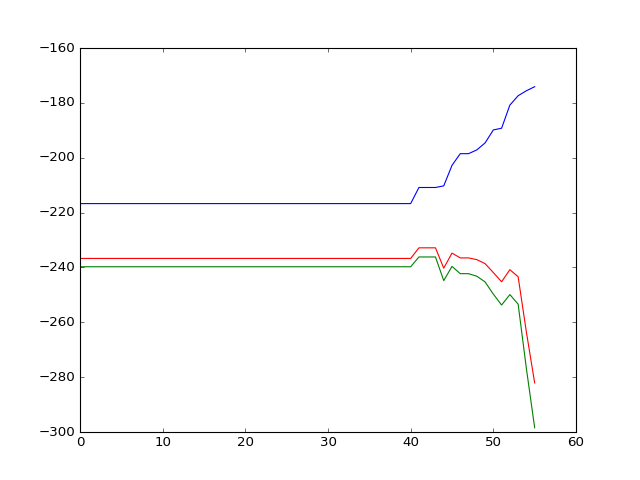

In [12]:
LLHs = []
BICs = []
AICs = []

for graph in graphs:
    try:
        
        mle = pgm.graphical_gaussian_estimation(algo='scd',
                                                data=data,
                                                graph=graph)
        
        
        dist = mle.estimated.copy()
    
        LLHs.append(2 * dist.loglikelihood(data))
    except:
        LLHs.append(float("nan"))
    finally:
        
        BICs.append(LLHs[-1] - dist.nb_parameters * math.log(len(data.events)))
        
        AICs.append(LLHs[-1] - dist.nb_parameters * 2)
       


fig = pyplot.figure()
axes = fig.add_subplot(111)
axes.plot(LLHs)
axes.plot(BICs)
axes.plot(AICs)


In [16]:
graph0 = graph = pgm.read_gml(os.path.join('results', 'graph.gml'))

In [17]:
aic = AICs.index(max(AICs))
bic = BICs.index(max(BICs))


<IPython.core.display.Javascript object>


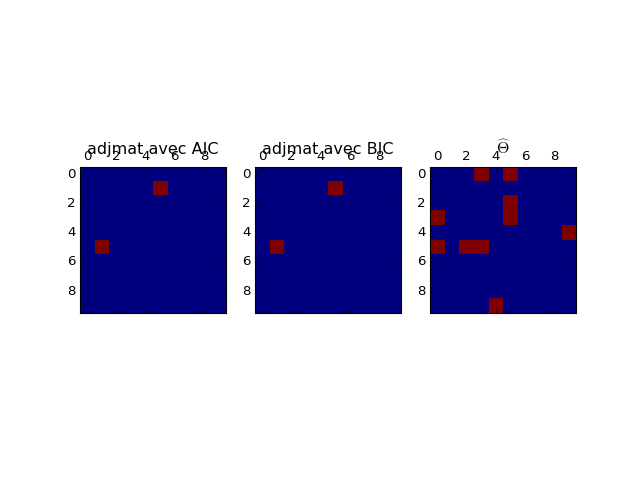

In [18]:
fig = pyplot.figure()
axes = graphs[aic].to_matrix().plot(axes = fig.add_subplot(131))
axes.set_title('adjmat avec AIC')
axes = graphs[bic].to_matrix().plot(axes = fig.add_subplot(132))
axes.set_title('adjmat avec BIC')
axes =  graph0.to_matrix().plot(axes = fig.add_subplot(133))
axes.set_title('$ \widehat \Theta$')